In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [24]:
md = pd.read_csv('D:/_2021_08_screen/S1_md.csv', delimiter=',', encoding='utf-8-sig')
compound_key = pd.read_csv('D:/_2021_08_screen/compounds/S1_randomized_compounds.csv', index_col=0)

In [25]:
compound_key.head()

,CAS ID,Compound,Num,Let,Compound Well,Plate Number
0,9/2/5451,5-Aminolevulinic acid (hydrochloride),2,B,B2,1-1
1,NaN,Alyssin,3,B,B3,1-1
2,112-39-0,Methyl palmitate,4,B,B4,1-1
3,116-26-7,Safranal,5,B,B5,1-1
4,168316-95-8,Spinosad,2,C,C2,1-1


In [26]:
compound_key['Plate Number'] =  compound_key['Plate Number'].str.strip().str[-1]
md['Compound library ID'] = md['Compound library ID'].str.strip().str[-1]


In [27]:
md.drop(md.columns[[3, 4, 12, 13, 16, 17, 18, 19, 20, 21]], axis = 1, inplace = True)
md = md.drop(md.index[0], axis=0)
md.head()

,Date:,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Temp (C),Humidity,Image ID,Scanner Slot:
1,8/23/21,Hodan,S1_R1_1,1,B2,B3,B4,B5,22.0,40.0,S1_001,1
2,8/23/21,Hodan,S1_R1_2,1,C2,C3,C4,C5,22.0,40.0,S1_001,2
3,8/23/21,Hodan,S1_R1_3,1,D2,D3,D4,D5,22.0,40.0,S1_001,3
4,8/23/21,Hodan,S1_R1_4,1,E2,E3,E4,E5,22.0,40.0,S1_001,4
5,8/23/21,Hodan,S1_R1_5,1,F2,F3,F4,F5,22.0,40.0,S1_002,1


In [28]:
def add_compoundA(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well A'])]['Compound']
    #print(compound.values)
    return compound.values[0]

def add_compoundB(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well B'])]['Compound']
    #print(compound.values)
    return compound.values[0]

def add_compoundC(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well C'])]['Compound']
    return compound.values[0]

def add_compoundD(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well D'])]['Compound']
    return compound.values[0]

In [29]:
md['Compound A'] = md.apply(
    lambda row: add_compoundA(row, compound_key), axis=1)

md['Compound B'] = md.apply(
    lambda row: add_compoundB(row, compound_key), axis=1)
    
md['Compound C'] = md.apply(
    lambda row: add_compoundC(row, compound_key), axis=1)
    
md['Compound D'] = md.apply(
    lambda row: add_compoundD(row, compound_key), axis=1)

In [58]:
ia_data = pd.read_csv('D:/_2021_08_screen/ia/All_reps.csv', index_col=0)
ia_data = ia_data.drop(['Strain', 'Large Object'], axis=1)
ia_data.head()

,WellNo,Total Worms,Chemotaxis,Compound,File Name,Well width,Plate ID
0,1A,380.0,0.108197,NaN,S1_001,3048.0,NaN
1,1B,387.0,0.125786,NaN,S1_001,3030.0,NaN
2,1C,407.0,-0.086705,NaN,S1_001,3010.0,NaN
3,1D,415.0,-0.101449,NaN,S1_001,3031.0,NaN
4,2A,363.0,-0.193220,NaN,S1_001,3065.0,NaN


In [59]:
md['Scanner Slot:'] = md['Scanner Slot:'].apply(str)

In [60]:
def add_PlateID(row, metadata):
    slotID = row['WellNo'][0]
    pid = metadata.loc[
        (metadata['Image ID']==row['File Name']) & 
        (metadata['Scanner Slot:']==slotID)]['Plate ID']
    #print(pid)
    return pid.values[0]

In [61]:
ia_data['Plate ID'] = ia_data.apply(
    lambda row: add_PlateID(row, md), axis=1)

In [62]:
def add_Compound(row, metadata):
    wellID = row['WellNo'][1]
    if wellID == 'A':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound A']
    elif wellID == 'B':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound B']
    elif wellID == 'C':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound C']
    elif wellID == 'D':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound D']
   #print(compound)
    return compound.values[0]

In [63]:
ia_data['Compound'] = ia_data.apply(
    lambda row: add_Compound(row, md), axis=1)

In [64]:
filtered = ia_data.loc[ia_data['Total Worms']>= 150] 
filtered.to_csv('D:/_2021_08_screen/ia/S1_filtered.csv')

In [65]:
dups = ['S1_R1_1', 'S1_R1_2', 'S1_R1_3', 'S1_R1_4', 'S1_R1_5', 'S1_R1_6']
ia_data = ia_data[~ia_data['Plate ID'].isin(dups)]
#ia_data.head()

In [66]:
sums = ia_data.groupby('Compound').mean().reset_index()

In [67]:
sums.head()

,Compound,Total Worms,Chemotaxis,Well width
0,(+)-Carvone,350.666667,0.086578,3053.000000
1,(-)-Borneol,289.000000,-0.054634,3042.333333
2,(-)-Cedrene,345.333333,0.128944,3036.000000
3,(-)-Huperzine A,270.333333,0.244933,3052.666667
4,1-octanol,217.333333,-0.458012,3042.333333


In [17]:
#sums.to_csv('/Volumes/LaCie/_2021_08_screen/quick_summary.csv')

In [18]:
#ia_data.to_csv('D:/_2021_08_screen/analysis/S1_ub_ia.csv')
#ia_data = pd.read_csv('D:/_2021_08_screen/analysis/S1_ub_ia.csv', index_col=0)
#ia_data.head()

,WellNo,Total Worms,Chemotaxis,Compound,File Name,Well width,Plate ID
8,3A,229.0,-0.265957,5-Aminolevulinic acid (hydrochloride),S1_002,3058.0,S1_R1_7
9,3B,275.0,-0.125541,Alyssin,S1_002,3065.0,S1_R1_7
10,3C,231.0,-0.353535,Methyl palmitate,S1_002,3043.0,S1_R1_7
11,3D,221.0,-0.255814,Safranal,S1_002,3075.0,S1_R1_7
12,4A,270.0,-0.176991,Spinosad,S1_002,3051.0,S1_R1_8


In [68]:
#Generating a file path to dynamically read in worm location files
wrm_locs_fldr = plb.Path('D:/_2021_08_screen/ia/')

In [69]:
def get_worm_locs(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    compound = row['Compound']
    xs = temp['X']
    #xs = list(temp['centroid-1'])
    if compound in result_dict:
        result_dict[compound] = result_dict[compound].append(xs)
        result_dict[compound].reset_index(inplace=True, drop=True)
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[compound]=xs
    
    return result_dict

In [81]:
# Need to create an empty dictionary to hold the values
results_dict = {}
for index, row in ia_data.iterrows():
    pooled = get_worm_locs(row, wrm_locs_fldr, results_dict)

In [82]:
#Remember that Dabest requires a dataframe. Casting dict to df
pooled_df = pd.DataFrame.from_dict(pooled)


In [83]:
# 1 inch = 25.4mm
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm

#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound
mm_df = pooled_df.apply(lambda x: -(x/px_mm)+32.5)
#mm_df.to_csv('D:/_2021_08_screen/analysis/S1_xs.csv')

### Sorting list of values for comparison against DMSO

In [90]:
ia_sort = sums.copy()
condition = (ia_sort.Compound=='DMSO') | (ia_sort.Compound=='H2O')

excluded = ia_sort[condition]
included = ia_sort[~condition]
sorted = included.sort_values(by='Chemotaxis',ascending=True)
ia_sort = pd.concat([excluded, sorted])
ia_sort.head()

,Compound,Total Worms,Chemotaxis,Well width
32,DMSO,356.000000,-0.009224,3040.333333
45,H2O,305.000000,0.004074,3050.333333
4,1-octanol,217.333333,-0.458012,3042.333333
67,Phytol,208.333333,-0.424344,3034.333333
36,Ellagic acid,273.666667,-0.299082,3042.333333


### Creating a sorted list for analysis against H2O

In [91]:
def swap_rows(df, i1, i2):
    a, b = df.iloc[0], df.iloc[1]
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

swapped = swap_rows(excluded, 0, 1)
h20_analysis = swapped.append(included)
h20_analysis.tail()

,Compound,Total Worms,Chemotaxis,Well width
91,p-Anisic acid,341.333333,-0.076448,3046.333333
92,p-Tolualdehyde,291.000000,0.189825,3039.666667
93,trans-Cinnamaldehyde,293.000000,0.019462,3051.666667
94,α-Phellandrene,259.000000,0.341553,3045.333333
95,β-Citronellol,265.666667,0.111548,3035.333333


In [54]:
h20_ordr = h20_analysis['Compound'].to_list()
h20_obj = db.load(mm_df, idx=(h20_ordr))
h20_md_results = h20_obj.mean_diff.results
h20_md_results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,H2O,DMSO,915,1068,mean difference,False,-0.418416,95,-1.835136,1.079114,...,5000,12345,0.5740,5000,5.824984e-01,0.549831,5.826499e-01,0.549608,5.920424e-01,495422.0
1,H2O,(+)-Carvone,915,1052,mean difference,False,0.703972,95,-0.733226,2.151434,...,5000,12345,0.3566,5000,3.498650e-01,-0.935080,3.489966e-01,-0.936761,3.573942e-01,469726.0
2,H2O,(-)-Borneol,915,867,mean difference,False,-1.210954,95,-2.762577,0.381913,...,5000,12345,0.1404,5000,1.380134e-01,1.483902,1.375771e-01,1.485543,1.374698e-01,412778.5
3,H2O,(-)-Cedrene,915,1036,mean difference,False,1.584452,95,-0.021242,3.080056,...,5000,12345,0.0408,5000,4.176785e-02,-2.037181,4.222333e-02,-2.032649,3.555616e-02,447868.0
4,H2O,(-)-Huperzine A,915,811,mean difference,False,3.374205,95,1.833230,4.954066,...,5000,12345,0.0000,5000,2.578590e-05,-4.219342,2.668109e-05,-4.211469,4.112834e-05,328651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,H2O,p-Anisic acid,915,1024,mean difference,False,-1.586643,95,-3.142784,-0.052098,...,5000,12345,0.0438,5000,4.107570e-02,2.044140,4.136976e-02,2.041164,3.869320e-02,493925.5
91,H2O,p-Tolualdehyde,915,873,mean difference,False,1.987114,95,0.397433,3.483390,...,5000,12345,0.0108,5000,1.113149e-02,-2.541192,1.120495e-02,-2.538883,1.454251e-02,372731.0
92,H2O,trans-Cinnamaldehyde,915,879,mean difference,False,-0.375126,95,-1.989382,1.223275,...,5000,12345,0.6526,5000,6.412641e-01,0.466011,6.411169e-01,0.466217,6.493164e-01,407130.5
93,H2O,α-Phellandrene,915,777,mean difference,False,4.949155,95,3.271456,6.519793,...,5000,12345,0.0000,5000,1.560789e-09,-6.072308,1.631275e-09,-6.064321,1.582380e-09,295028.0


In [76]:
cmpd_ordr = ia_sort['Compound'].to_list()


In [85]:
db_obj = db.load(mm_df, idx=(cmpd_ordr))
#S1_CI_plt = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena')

In [86]:
#dir(db_obj._Dabest__mean_diff._EffectSizeDataFrame__pre_calc)

In [87]:
mean_width = ia_data['Well width'].mean()
print(mean_width)

3040.777777777778


In [88]:
pooled_mm_obj = db.load(mm_df, idx=(cmpd_ordr))
results_df_mm = pooled_mm_obj.mean_diff.results
#results_df_mm.to_csv('D:/_2021_08_screen/analysis/150_filtered_mm.csv')

In [89]:
same = results_df_mm.loc[(results_df_mm['bca_low'] < 0) & (results_df_mm['bca_high'] > 0)]
same_comps = same['test'].to_list()
diff = results_df_mm[~results_df_mm['test'].isin(same_comps)]
diff

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,1068,652,mean difference,False,-7.446258,95,-8.944625,-5.916856,...,5000,12345,0.0000,5000,1.049841e-21,9.717362,2.703217e-20,9.347132,1.296941e-18,436169.5
2,DMSO,Phytol,1068,625,mean difference,False,-6.248916,95,-7.800290,-4.622622,...,5000,12345,0.0000,5000,5.494421e-14,7.599271,1.175689e-13,7.481410,1.811060e-13,405215.0
3,DMSO,Ellagic acid,1068,821,mean difference,False,-4.088034,95,-5.535870,-2.637354,...,5000,12345,0.0000,5000,2.622056e-08,5.589006,4.538344e-08,5.490980,3.481071e-07,498293.0
4,DMSO,Methyl palmitate,1068,714,mean difference,False,-3.983911,95,-5.508219,-2.496946,...,5000,12345,0.0000,5000,4.095835e-07,5.085540,6.014179e-07,5.008979,1.825667e-06,432069.5
5,DMSO,2-nonanone,1068,867,mean difference,False,-4.575976,95,-6.020000,-3.096992,...,5000,12345,0.0000,5000,1.936083e-09,6.032800,2.227250e-09,6.008853,3.639988e-09,535088.0
6,DMSO,Salvinorin A Propionate,1068,926,mean difference,False,-3.313405,95,-4.793185,-1.846934,...,5000,12345,0.0000,5000,1.228296e-05,4.383759,1.248376e-05,4.380002,1.484407e-05,550018.5
7,DMSO,Spinosad,1068,708,mean difference,False,-2.977241,95,-4.595811,-1.387490,...,5000,12345,0.0004,5000,2.863150e-04,3.635848,2.885630e-04,3.632595,2.759959e-04,416556.5
8,DMSO,Camphor,1068,832,mean difference,False,-2.563090,95,-4.042650,-1.046252,...,5000,12345,0.0006,5000,8.031253e-04,3.357349,8.605385e-04,3.337872,1.241985e-03,482599.5
9,DMSO,Oleanolic Acid,1068,730,mean difference,False,-1.760109,95,-3.393989,-0.206566,...,5000,12345,0.0324,5000,3.055372e-02,2.164798,3.056667e-02,2.164379,2.923899e-02,413391.5
10,DMSO,Ursolic acid,1068,884,mean difference,False,-2.229335,95,-3.737300,-0.736521,...,5000,12345,0.0036,5000,3.954668e-03,2.885328,3.934319e-03,2.886827,3.827441e-03,507905.5


In [47]:
def halfviolin(v, half='right', fill_color='k', alpha=1,
                line_color='k', line_width=0):
    for b in v['bodies']:
        V = b.get_paths()[0].vertices

        mean_vertical = np.mean(V[:, 0])
        mean_horizontal = np.mean(V[:, 1])

        if half == 'right':
            V[:, 0] = np.clip(V[:, 0], mean_vertical, np.inf)
        elif half == 'left':
            V[:, 0] = np.clip(V[:, 0], -np.inf, mean_vertical)
        elif half == 'bottom':
            V[:, 1] = np.clip(V[:, 1], -np.inf, mean_horizontal)
        elif half == 'top':
            V[:, 1] = np.clip(V[:, 1], mean_horizontal, np.inf)

        b.set_color('orange')
        b.set_alpha(.8)
        b.set_edgecolor('black')
        b.set_linewidth(line_width)


In [48]:
df_test = pd.DataFrame(columns = ['test' ,'vals'])
df = pd.DataFrame(columns = ['test' ,'vals'])
for index, row in results_df_mm.iterrows():
    vals = row['bootstraps']
    test = row['test']
    df_test['vals']=vals
    df_test['test']=str(test)
    df = df.append(df_test)
    #vals = list(results_df_mm.iloc[row]['bootstraps'])
    #df = pd.DataFrame(vals, columns = ['vals'])
    #df['test'] = results_df_mm.iloc[row]['test']
    #df_test.append(df)
    
print(len(df))

475000


In [49]:
df['test'] = df['test'].astype('category')
df.reset_index(drop=True)
df.dtypes

test    category
vals     float64
dtype: object

In [50]:
h20 = df.query('test == "H2O"')['vals']
diacetyl = df.query('test == "Diacetyl"')['vals']
h20

0      -1.951897
1      -1.852147
2      -1.843145
3      -1.823018
4      -1.809756
          ...   
4995    2.765619
4996    2.829479
4997    2.847248
4998    3.050905
4999    3.291839
Name: vals, Length: 5000, dtype: float64

In [51]:
data = {'test':['DMSO'], 'vals':[0]} 
blank = pd.DataFrame(data)
df = blank.append(df)
df.tail()
df.head()

,test,vals
0,DMSO,0.000000
0,H2O,-1.951897
1,H2O,-1.852147
2,H2O,-1.843145
3,H2O,-1.823018


In [52]:
comps = df['test'].unique()
xtick_labels = list(comps)
tick_range = list(range(len(comps)))

combined = []

for i, c in enumerate(comps):
    data = df.loc[df['test'] == c]['vals']
    combined.append(data)    

In [53]:
print(xtick_labels)

['DMSO', 'H2O', '1-octanol', 'Phytol', 'Ellagic acid', 'Methyl palmitate', '2-nonanone', 'Salvinorin A Propionate', 'Spinosad', 'Camphor', 'Oleanolic Acid', 'Ursolic acid', 'Myrcene', 'Daucosterol', 'Rosmarinic acid', 'L-Ornithine', 'Alyssin', 'Kaempferol', 'Beta caryophyllene', 'p-Anisic acid', 'Anethole trithione', 'Germacrene D', 'Octyle acetate', 'Safranal', '(-)-Borneol', 'Deguelin', 'Pogostone', 'Ethyl p-methoxycinnamate', '5-Aminolevulinic acid (hydrochloride)', 'Loganin', 'Curcumenol', 'Carvacrol', 'Carnosic acid', 'Taurine', 'Salicylic acid', 'Galanthamine', 'Bergapten', 'L-Citrulline', 'Cafestol', 'Eucalyptol', 'trans-Cinnamaldehyde', 'Sitogluside', 'Ajmalicine', 'Spermidine', 'Maslinic acid', 'Micheliolide', 'Vincristine (sulfate)', 'Cadaverine', 'Trans-Anethole', 'Menthol', 'Nerolidol', 'Nootkatone', 'Geranyl Acetate', 'Citronellol', 'Skatole', 'Lapachol', 'Sabinene', 'Apigenin', 'Pellitorine', '(+)-Carvone', 'Sinomenine hydrochloride', 'Caffeine', 'Ethyl palmitate', 'Agmat

In [54]:
#xtick_labels.insert(0 ,'DMSO\n Control Group ')


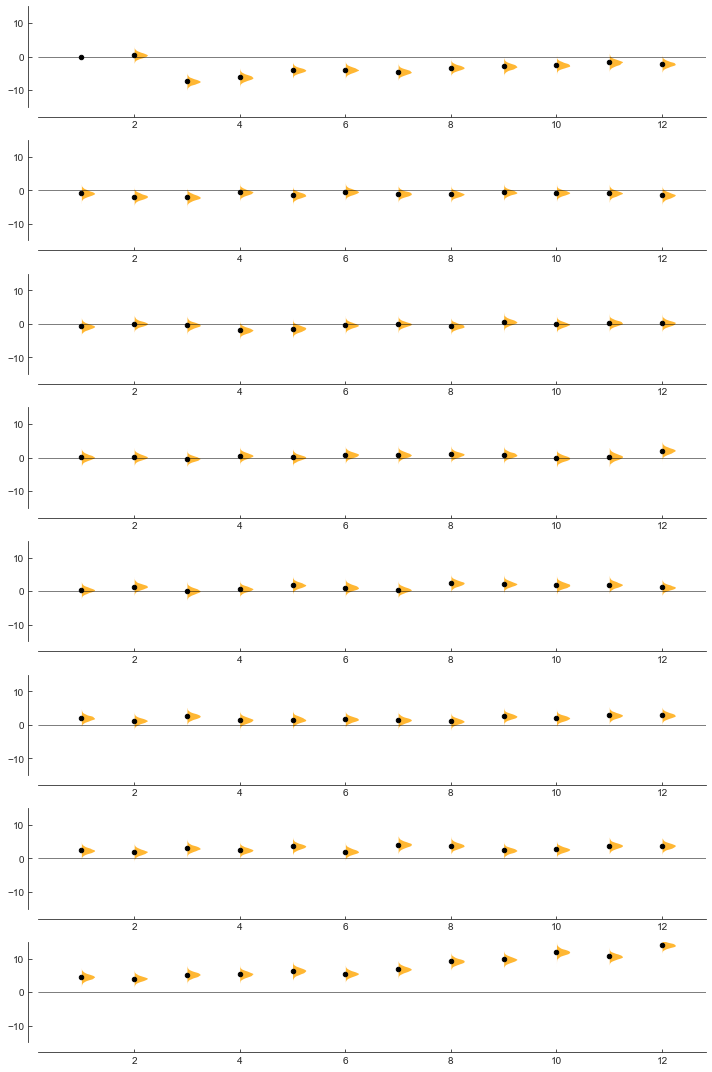

In [59]:
chunk = 12
sns.set_style('ticks')

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10,15))

comps = df['test'].unique()
#xtick_labels = list(comps)

n = 12
a = np.arange(n)


for i in range(0,8):
    top = (i+1)*chunk
    bottom = top - chunk
    #current_labels=list(xtick_labels[bottom:top])
    current_dat=combined[bottom:top]
    
    p= ax[i].violinplot(current_dat, showmeans=True)
    halfviolin(p)
    
    
    #ax[i].set_xticks(list(a+1))
    ax[i].tick_params(axis='both', tickdir='in')
    #ax[i].set_xticklabels(current_labels, rotation=45)
    ax[i].set_ylim(-15,15)
    ax[i].axhline(0, c='black', lw=.5)


    xy = [[l.vertices[:,0].mean(),l.vertices[0,1]] for l in p['cmeans'].get_paths()]
    xy = np.array(xy)
    ax[i].scatter(xy[:,0], xy[:,1],s=20, c="black", marker="o", zorder=3)

    p['cmeans'].set_visible(False)
    p['cmaxes'].set_visible(False)
    p['cmins'].set_visible(False)
    p['cbars'].set_visible(False)


 
sns.despine(offset=10)
fig.tight_layout()
fig.savefig('D:/_2021_08_screen/figs/confInt_nums.png')

